In [1]:
import pandas as pd

In [6]:
A=pd.read_csv("F:/data science workshop/DATA-SET/data/50_Startups (1).csv")

In [7]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
import seaborn as sb

In [11]:
import matplotlib.pyplot as plt

In [13]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

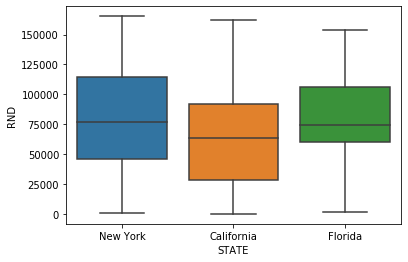

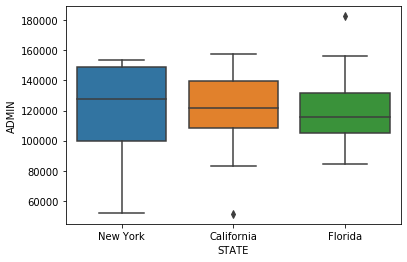

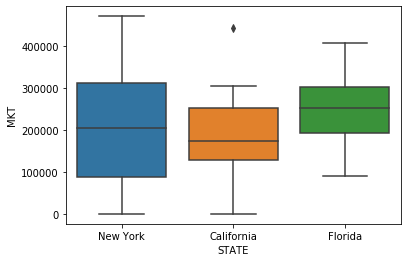

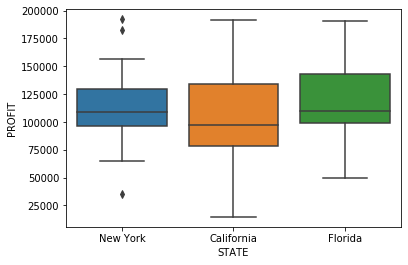

In [15]:
for i in con:
    sb.boxplot(A.STATE,A[i])
    plt.show()

In [17]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RND       50 non-null float64
ADMIN     50 non-null float64
MKT       50 non-null float64
STATE     50 non-null object
PROFIT    50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [21]:
A.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [22]:
np=[]
for i in A.PROFIT:
    if(i<112012.63):
        np.append(0)
    else:
        np.append(1)

In [24]:
A['newprofit']=np

In [25]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT,newprofit
0,165349.20,136897.80,471784.10,New York,192261.83,1
1,162597.70,151377.59,443898.53,California,191792.06,1
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [29]:
A['newprofit'].dtypes

dtype('int64')

In [30]:
con

['RND', 'ADMIN', 'MKT', 'PROFIT']

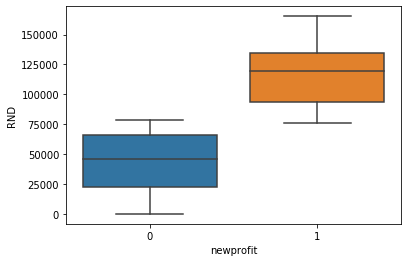

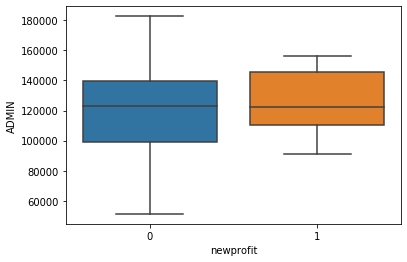

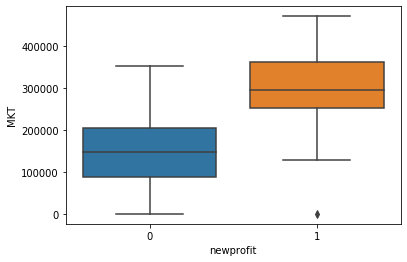

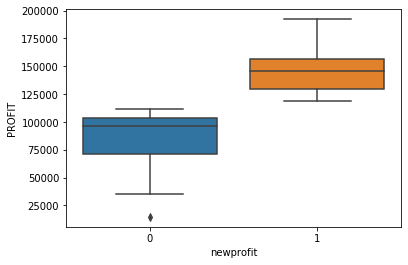

In [31]:
for i in con:
    sb.boxplot(A.newprofit,A[i])
    plt.show()

In [32]:
X=A[["RND","MKT"]]
Y=A[["newprofit"]]

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr=LogisticRegression()

In [38]:
model=lr.fit(xtrain,ytrain)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
pred=model.predict(xtest)

In [40]:
model.predict_proba(xtest)

array([[0.71321923, 0.28678077],
       [0.619457  , 0.380543  ],
       [0.09286853, 0.90713147],
       [0.44144234, 0.55855766],
       [0.16730095, 0.83269905],
       [0.17235628, 0.82764372],
       [0.57896089, 0.42103911],
       [0.24655535, 0.75344465],
       [0.66395624, 0.33604376],
       [0.0190826 , 0.9809174 ]])

In [41]:
from sklearn.metrics import mean_absolute_error


In [42]:
mae=mean_absolute_error(ytest,pred)

In [43]:
mae

0.5